In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data_dup = data.duplicated().any()
data_dup

True

In [5]:
data = data.drop_duplicates()  

In [6]:
cate_val=[] 
cont_val=[]  

for column in data.columns:
    if data [column].nunique () <=10:
        cate_val.append (column)
    else:
        cont_val.append (column)

In [7]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [8]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [9]:
data ['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

<Axes: ylabel='count'>

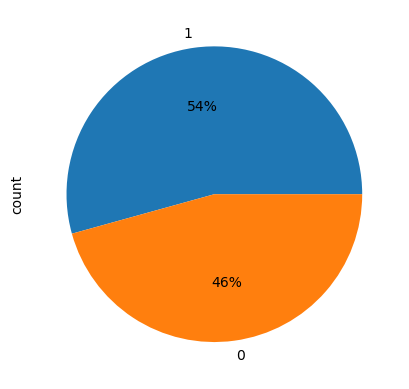

In [10]:
data['target'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [11]:
# print first 5 rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
# print last 5 rows of the dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [13]:
data.shape

(302, 14)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [15]:
#analize data
# statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [17]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [18]:
#Splitting the Features and Target

X = data.drop(columns='target', axis=1) #axis=0 refers to operations along the rows (vertical axis), while axis=1 refers to operations along the columns
Y = data['target']

In [19]:
print(X)

          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0   -0.267966    1   0 -0.376556 -0.667728    0        1  0.806035      0   
1   -0.157260    1   0  0.478910 -0.841918    1        0  0.237495      1   
2    1.724733    1   0  0.764066 -1.403197    0        1 -1.074521      1   
3    0.728383    1   0  0.935159 -0.841918    0        1  0.499898      0   
4    0.839089    0   0  0.364848  0.919336    1        1 -1.905464      0   
..        ...  ...  ..       ...       ...  ...      ...       ...    ...   
723  1.503322    0   2 -0.661712 -0.687083    0        0 -1.511859      0   
733 -1.153610    0   2 -1.346085 -2.041893    0        1  1.112172      0   
739 -0.267966    1   0 -0.205463  0.164513    0        1  0.499898      1   
843  0.506972    1   3  1.619532  0.512893    0        0 -1.074521      0   
878 -0.046555    1   0 -0.661712 -1.132235    0        1 -1.599327      0   

      oldpeak  slope  ca  thal  
0   -0.037124      2   2     3  
1    1.77

In [20]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(302, 13) (241, 13) (61, 13)


# decision tree


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [25]:
# accuracy on training data
X_train_prediction = dt.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [26]:
 #accuracy on test data
X_test_prediction = dt.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7213114754098361


In [27]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)
    
 # classification metrics for training data
precision_recall_f1_score(Y_train, X_train_prediction)
# classification metrics for test data
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 1.0
Recall = 1.0
F1 Score = 1.0
Precision = 0.7241379310344828
Recall = 0.7
F1 Score = 0.711864406779661


# Logistic Regression

In [28]:
log = LogisticRegression()

In [29]:
#learning model
# training the LogisticRegression model with Training data
log.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [30]:
# accuracy on training data
X_train_prediction = log.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8464730290456431


In [32]:
 #accuracy on test data
X_test_prediction = log.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


In [34]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)
    
 # classification metrics for training data
precision_recall_f1_score(Y_train, X_train_prediction)
# classification metrics for test data
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.825503355704698
Recall = 0.917910447761194
F1 Score = 0.8692579505300353
Precision = 0.7714285714285715
Recall = 0.9
F1 Score = 0.8307692307692308


# random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier()

In [37]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [38]:
# accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [39]:
 #accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7704918032786885


In [40]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)
    
 # classification metrics for training data
precision_recall_f1_score(Y_train, X_train_prediction)
# classification metrics for test data
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 1.0
Recall = 1.0
F1 Score = 1.0
Precision = 0.75
Recall = 0.8
F1 Score = 0.7741935483870968


In [41]:
new_data =pd.DataFrame({
'age':52,
'sex':1,
'cp':0,
'trestbps':125, 
'chol':212,
'fbs':0,
'restecg':1,
'thalach':168,
'exang':0,
'oldpeak':1.0,
'slope':2,
'ca':2,
'thal':3
},index= [0])

In [42]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [43]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


# save model using joblib

In [44]:
!pip install joblib
import joblib
joblib.dump(rf,"model_joblib_heart")
model=joblib.load("model_joblib_heart")
model.predict(new_data)

array([0], dtype=int64)

# GUI

In [45]:
from tkinter import *
import joblib

In [ ]:
import tkinter as tk  # Importing tkinter module

def show_entry_fields():
    p1 = int(e1.get()) 
    p2 = int(e2.get()) 
    p3 = int(e3.get())
    p4 = int(e4.get()) 
    p5 = int(e5.get()) 
    p6 = int(e6.get())
    p7 = int(e7.get()) 
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = int(e10.get())
    p11 = int(e11.get()) 
    p12 = int(e12.get())
    p13 = int(e13.get())
    model = joblib.load("model_joblib_heart")
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])

    if result == 0:
        tk.Label(master, text="No Heart Diseases").grid(row=31) 
    else:
        tk.Label(master, text="Possibility of Heart Diseases").grid(row=31)

master = tk.Tk()  # Creating Tkinter window
master.title("Heart Diseases Prediction System")

# Labels and Entry Widgets for user input
tk.Label(master, text="Heart Diseases Prediction System", bg="black", fg="white").grid(row=0, columnspan=2)
tk.Label(master, text="Enter Your Age").grid(row=1)
tk.Label(master, text="Male Or Female [1/0]").grid(row=2)
tk.Label(master, text="Enter Value of CP").grid(row=3)
tk.Label(master, text="Enter Value of trestbps").grid(row=4)
tk.Label(master, text="Enter Value of chol").grid(row=5)
tk.Label(master, text="Enter Value of fbs").grid(row=6)
tk.Label(master, text="Enter Value of restecg").grid(row=7)
tk.Label(master, text="Enter Value of thalach").grid(row=8)
tk.Label(master, text="Enter Value of exang").grid(row=9)
tk.Label(master, text="Enter Value of oldpeak").grid(row=10)
tk.Label(master, text="Enter Value of slope").grid(row=11)
tk.Label(master, text="Enter Value of ca").grid(row=12)
tk.Label(master, text="Enter Value of thal").grid(row=13)


# Entry widgets for user input
e1 = tk.Entry(master)
e2 = tk.Entry(master)
e3 = tk.Entry(master)
e4 = tk.Entry(master)
e5 = tk.Entry(master)
e6 = tk.Entry(master)
e7 = tk.Entry(master)
e8 = tk.Entry(master)
e9 = tk.Entry(master)
e10 = tk.Entry(master)
e11 = tk.Entry(master)
e12 = tk.Entry(master)
e13 = tk.Entry(master)


# Placing Entry widgets in grid
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)


# Place more Entry widgets for other inputs as needed...

# Button to trigger prediction
tk.Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1)

mainloop()  # Running Tkinter event loop